In [1]:
# The user specifies if running notebook on GoogleColab or locally
UseGoogleColab = True

In [2]:
if UseGoogleColab:
    from google.colab import drive
    drive.mount('/content/drive')
    USERDIR='/content/drive/MyDrive/hightea/'
else:
    USERDIR='.'

#Install hightea client and plotting library
%pip install hightea-client > /dev/null
%pip install hightea-plotting > /dev/null
from hightea.client import Interface as hightea
from hightea.plotting import plot,Run

A simple example job

In [3]:
job = hightea('Example-ttbar-simple',directory=USERDIR)     # define new job
job.process('pp_tt_13000_172.5')                            # specify process for job

   pp -> tt~ + X at 13 TeV mt = 172.5 GeV 

Process tag         :  pp_tt_13000_172.5  (use for process specification)
Momenta layout      :  ['t', 'tbar']
Default scales      :  muR0 = HT/4, muF0 = HT/4
Default pdf         :  NNPDF31_nnlo_as_0118 / 0
Avail. contributions:  ['NNLO', 'NLO', 'LO']
Predefined variables
   pt_t        :  sqrt(p_t_1**2 + p_t_2**2)
   pt_tbar     :  sqrt(p_tbar_1**2 + p_tbar_2**2)
   y_t         :  0.5*log((p_t_0 + p_t_3)/(p_t_0 - p_t_3))
   y_tbar      :  0.5*log((p_tbar_0 + p_tbar_3)/(p_tbar_0 - p_tbar_3))
   m_tt        :  sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)
   mt_t        :  sqrt(172.5*172.5+pt_t*pt_t)
   mt_tbar     :  sqrt(172.5*172.5+pt_tbar*pt_tbar)
   HTo4        :  (mt_t+mt_tbar)/4.
Details:

 Parameters

 - pp collisions at 13 TeV
 - top-quark mass: mt = 172.5 GeV
 - number of massless flavours: nl = 5

 Contributions details

 - LO      : pQCD, aS^2
 - NLO     : pQCD, aS^2 + aS^3
 - NNLO    : pQCD,

In [4]:
job.define_new_variable('circle',                               # specify a new variable
                        'sqrt(pt_t**2+pt_tbar**2)')
job.contribution('NLO')                                         # specify contribution
job.scales('m_tt','m_tt*2')                                     # choose renormalization and factorization scale
job.pdf('CT14nnlo')                                             # choose pdf
job.observable('circle',[0.,50.,100.,150.,200.,250.,300.,350.]) # specify binning: variable and bin edges
job.scale_variation('3-point')                                  # add scale variation

In [5]:
job.request()

token request  0  :  4zlja1DHkMZcdUiUcOxJmGG_LeFFGgPBHuiY2qu3UZM
token request  1  :  mtKroE3dn0CT20F1lAnnWpVaUS4NWTJb2SYSv_GVgLE
token request  2  :  Z5Vrs1mS17bxihAcA8V3gWTTqEBbd6tWkmYr2H4580U
request submitted :  2023-03-26 04:18:29.851644
request finished  :  2023-03-26 04:18:43.178009


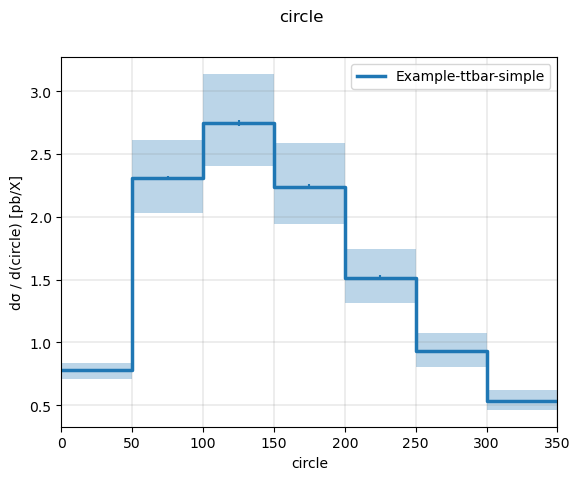

In [6]:
plot(job.result());

In [7]:
job.show_result()

Name                    :  Example-ttbar-simple
Contributions           :  ['NLO']
muR                     :  m_tt
muF                     :  m_tt*2
pdf                     :  CT14nnlo , 0
fiducial xsection [pb]  :    5.910E+02
  mc-error [pb] ([%])   :  2.3E+00 (3.9E-01)
sys. unc. [pb] ([%])    : scale (3)
                        :  +8.4E+01 (1.4E+01) / -7.5E+01 (1.3E+01)
Histogram     : circle
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] ([%]) | scale (3) [pb] ([%])                    |
 0.000E+00 | 5.000E+01 |   3.894E+01 | 6.7E-01 (1.7E+00) | +2.7E+00 (7.0E+00) / -3.3E+00 (8.5E+00) |
 5.000E+01 | 1.000E+02 |   1.155E+02 | 9.1E-01 (7.9E-01) | +1.5E+01 (1.3E+01) / -1.4E+01 (1.2E+01) |
 1.000E+02 | 1.500E+02 |   1.374E+02 | 1.1E+00 (8.1E-01) | +2.0E+01 (1.4E+01) / -1.7E+01 (1.3E+01) |
 1.500E+02 | 2.000E+02 |   1.120E+02 | 1.0E+00 (9.0E-01) | +1.7E+01 (1.5E+01) / -1.5E+01 (1.3E+01) |
 2.000E+02 | 2.500E+02 |   7.582E+01 | 9.2E-01 (1.2E+00) | +1.2E+01 (1.5E+01) / -1.0E+01 (1.3E+0